# Webscrapping using BeautifulSoup (Wikipedia) & Exploratory Data Analysis


## Background

In this Python project, we aim to showcase our web scraping proficiency using the BeautifulSoup library on a real website, specifically Wikipedia. Our focus is on extracting information about the top 50 companies globally based on their revenue. It's essential to note that the data obtained from the Wikipedia page may be incomplete, given that not all companies disclose their information to the media or the general public.

the link of the webpage : https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue

The compilation we're working with represents the world's leading companies, determined by their consolidated revenue according to the 2023 Fortune Global 500 rankings and other reliable sources. This curated list spotlights the top 50 companies, each with annual revenues exceeding US$130 billion.

Our approach involves scraping this information and transforming it into a structured dataset, formatted as a dataframe with eight columns: rank, name, industry, revenue, profit, number of employees, headquarters location, and the company's ownership status (public or private). Following this, we'll perform data cleaning tasks, addressing missing values and adjusting data types for each column.

Subsequently, we'll delve into analyses to answer various questions related to the dataset's content. Furthermore, we plan to enrich the project by presenting visualizations derived from the dataset, providing a clearer understanding of the gathered information.

Finally, we will delve into Shiny, a powerful tool for creating interactive web applications. Our objective is to develop captivating applications for visualizing our dataset. Interestingly, it's worth noting that Shiny  can also be employed with Python. Additionally, the convenience of ShinyLive, integrated into our web browser, allows us to seamlessly construct our dashboard. With that brief introduction,let's move on!

## Project Flow includes: 
1. Build new environment 
2. Requesting the data
3. Creating a BeautifulSoup object
4. Finding the right key to scrap the data and extracting the correct information 
5. Store to DataFrame
6. Creating data frame and data wrangling
7. Analysis and data visualization 
8. Build interactive visualization with Shiny 
9. Save on the Github 

## 1. Build a New Environment 

- Create a new virtual environment named web_scrapping using Python version 3.10

  `conda create -n web_scrapping python=3.10`
  
  
- Activate the newly created virtual environment

  `conda activate web_scrapping`


- Install kernel to connect the virtual environment to the Jupyter Notebook.

  `pip install ipykernel`

  `python -m ipykernel install --user --name=web_scrapping`
  
  
- Install all the requirement (library) in terminal by using

  `pip install` 

## 2. Requesting the Data

Let's begin with importing the required library requests.
Request the web from the site with get method to collect of webpage and assign it to a variable called url_get.
Print a small part of url_get to check the content of the HTML.

In [1]:
import requests

url_get = requests.get('https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue')

To visualize what exactly you get from the `request.get`, we can use `.content` so we can see what we exactly get, in here. I slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled vector-feature-client-prefer'

## 3. Create a BeautifulSoup Object

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the BeautifulSoup.  `BeautifulSoup` transforms a complex HTML document into a complex tree of Python objects. 

- Import `BeautifulSoup` from `bs4`.
- Create an object by using `BeautifulSoup` and the `html-parser` is used because it is built into the standard library of Python. When we use html.parser as the parser argument in BeautifulSoup, we are telling it to use Python's built-in HTML parser to parse the HTML document.
- Assign it as variable called `soup`
- We can use `print(soup.prettify())` to display the content of a BeautifulSoup object in a more human-readable and nicely formatted way.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

#The content is a bit long. 
#print(soup.prettify())

## 4. Finding the right key to scrap the data

- Go to the Wikipedia webpage and right click to the place that we're interested in and choose inspect element (Mac User) to observe the HTML pages. 
- The part that we are interested in is nested in `<table class="wikitable sortable jquery-tablesorter" style="text-align:left;">`.
-Apply `.find()` and assign it as avariable called `table` 


![Sample Image](image/Key_1.jpg)

In [4]:
table = soup.find('table')

#print(table.prettify())

Now we need to find the row length of the content. 

- As you can see in below picture that we found the values for each column under the `<tr>`. 
- Assign it as varaible called `companies` to store all elements by using `find_all()` 
- Check the row length of the companies to ensure that it is 50 lists of companies by using `len()` function. Uppps, there are actually 52 rows. Why is that? It is because when the content in the companies are included the `<thread>` and `<tbody>`. The `<thread>` has 2 header `<tr>` and `<tbody>` has 50 header `<tr>`. And the content that we need actually located in `<tbody>`

![Sample Image](image/Pic_2.jpg)

In [5]:
companies = table.find_all('tr')
row_length = len(companies)
row_length

#companies

52

## 4.1 Extract the information : The rank 

- Found that the rank is wrapped in the `<th>`
- Example : `<th scope="column"> 1 </th>`

![Sample Image](image/Pic_3_new.jpg)

In [6]:
rank = companies[2].th.get_text(strip = True)
print(rank)

1


## 4.2 Extract the information : The companies name

- Found that the rank is wrapped in a header tag `<td>` with located in the `index = [0]` of `companies[2]`
- Example : `<td> <a href="/wiki/Walmart" title="Walmart"> Walmart </a> </td>`
- Use the `get_text()` to collect the text value

![Sample Image](image/Pic_4.jpg)

In [7]:
name = companies[2].find_all('td')[0].get_text(strip = True)
print(name)

Walmart


## 4.3 Extract the information : The industry

- Found that the rank is wrapped in a header tag `<td>` with located in the `index = [1]` of `companies[2]`
- Example : `<td> <a href="/wiki/Retail" title="Retail"> Retail </a> </td>`


In [8]:
industry = companies[2].find_all('td')[1].a.get_text(strip=True)
print(industry)

Retail


## 4.4 Extract the information : The revenue

- Found that the rank is wrapped in a header tag `<td>` with located in the `index = [2]` of `companies[2]`
- Example : `<td style="text-align:center;"> <span typeof="mw:File"> <span title="Increase"> <img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span> </span> $611,289 </td>`
- Remove the `$` and `comma` signs 


In [9]:
revenue = companies[2].find_all('td')[2].get_text(strip=True).replace('$', '').replace(',','')

print(revenue)

611289


## 4.5 Extract the information : The profit

- Found that the rank is wrapped in a header tag `<td>` with located in the `index = [3]` of `companies[2]`
- Example : `<td style="text-align:left;"> $11,680 </td>`
- Remove the `$` and `comma` signs 



In [10]:
profit = companies[2].find_all('td')[3].get_text(strip=True).replace('$', '').replace(',','')
print(profit)

11680


## 4.6 Extract the information : The number of employees

- Found that the rank is wrapped in a header tag `<td>` with located in the `index = [4]` of `companies[2]`
- Example : `<td style="text-align:right;"> 2,100,000 </td>`


In [11]:
employee = companies[2].find_all('td')[4].get_text(strip=True).replace(',', '')

print(employee)

2100000


## 4.7 Extract the information : The headquarter location

- Found that the rank is wrapped in a header tag `<td>` with located in the `index = [5]` of `companies[2]`
- Example : `<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><a href="/wiki/United_States" title="United States"><img alt="United States" class="mw-file-element" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" width="23"/></a></span></span>United States</td>`


In [12]:
location = companies[2].find_all('td')[5].get_text(strip=True)

print(location)

United States


## 4. Initialize the storage (create a loop function)  

- Create a empty list and assign it as `temp`. 
- Create a for loop to collect all the information and store it in `temp`.

In [13]:
#initiating a empty list
temp = [] 

#create a loop function to collect all values from the below variable 
for i in range(2, row_length):
    
    rank = companies[i].th.get_text(strip = True)
    name = companies[i].td.a.get_text(strip = True)
    industry = companies[i].find_all('td')[1].a.get_text(strip=True)
    revenue = companies[i].find_all('td')[2].get_text(strip=True).replace('$', '').replace(',','')
    profit = companies[i].find_all('td')[3].get_text(strip=True).replace('$', '').replace(',','')
    employee = companies[i].find_all('td')[4].get_text(strip=True).replace(',','')
    location = companies[i].find_all('td')[5].get_text(strip=True)
    
    #using append to append the value in the temp
    temp.append((rank, name, industry, revenue, profit, employee, location))

    
temp

[('1', 'Walmart', 'Retail', '611289', '11680', '2100000', 'United States'),
 ('2',
  'Saudi Aramco',
  'Oil and gas',
  '603651',
  '159069',
  '70496',
  'Saudi Arabia'),
 ('3',
  'State Grid Corporation of China',
  'Electricity',
  '530009',
  '8192',
  '870287',
  'China'),
 ('4', 'Amazon', 'Retail', '513983', '−2722', '1541000', 'United States'),
 ('5', 'Vitol', 'Commodities', '505000', '15000', '1560', 'Switzerland'),
 ('6',
  'China National Petroleum Corporation',
  'Oil and gas',
  '483019',
  '21080',
  '1087049',
  'China'),
 ('7',
  'China Petrochemical Corporation',
  'Oil and gas',
  '471154',
  '9657',
  '527487',
  'China'),
 ('8',
  'ExxonMobil',
  'Oil and gas',
  '413680',
  '55740',
  '63000',
  'United States'),
 ('9', 'Apple', 'Electronics', '394328', '99803', '164000', 'United States'),
 ('10', 'Shell', 'Oil and gas', '386201', '20120', '93000', 'United Kingdom'),
 ('11',
  'UnitedHealth Group',
  'Healthcare',
  '324162',
  '20120',
  '400000',
  'United States'

## 5. Creating the Dataset 

- In this section, we will put the array into dataframe and assign it as `df`.
- First, we import pandas library 
- Change rename the columns

In [14]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('rank', 'companies_name', 'industry', 'revenue', 'profit', 'employee_number', 'headquarter_location'))

#Check first 5 rows
df.head()

,rank,companies_name,industry,revenue,profit,employee_number,headquarter_location
0,1,Walmart,Retail,611289,11680,2100000,United States
1,2,Saudi Aramco,Oil and gas,603651,159069,70496,Saudi Arabia
2,3,State Grid Corporation of China,Electricity,530009,8192,870287,China
3,4,Amazon,Retail,513983,−2722,1541000,United States
4,5,Vitol,Commodities,505000,15000,1560,Switzerland


## 6. Cleaning the dataset 

Now, we can go a head to inspect and clean the dataset. We can use `info()` to check the dataset. As you can see in the result : 
- We need to change the datatype for columns `rank`, `industry`, `revenue_$`, `profit_$` and `empoyee_number`
- If you see the table, there are two company `Cargill` and `Schwarz Gruppe` have `non-value` in their profit. Thus, we change change it with `0` (assume the company dont make a profit those fiscal year). 
- Delete all the `$` and `comma` signs

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   rank                  50 non-null     object
 1   companies_name        50 non-null     object
 2   industry              50 non-null     object
 3   revenue               50 non-null     object
 4   profit                50 non-null     object
 5   employee_number       50 non-null     object
 6   headquarter_location  50 non-null     object
dtypes: object(7)
memory usage: 2.9+ KB


In [16]:
#Change datatype of columns revenue and employee_number into interger
df[['revenue', 'employee_number']] = df[['revenue', 'employee_number']].astype(int)


# Replace the non-standard minus sign with the standard minus sign
df['profit'] = df['profit'].str.replace('−', '-')

# Convert the column to integers and fill the non values to 0 
df['profit']  = pd.to_numeric(df['profit'], errors='coerce').fillna(0).astype(int)


In [17]:
#Check the info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   rank                  50 non-null     object
 1   companies_name        50 non-null     object
 2   industry              50 non-null     object
 3   revenue               50 non-null     int64 
 4   profit                50 non-null     int64 
 5   employee_number       50 non-null     int64 
 6   headquarter_location  50 non-null     object
dtypes: int64(3), object(4)
memory usage: 2.9+ KB


In [18]:
#Check the dataset
df_clean = df.copy()

## 7. Ok, now let's do some analysis!!

Possible questions that we can answer based on this information are: 
1. **How is the revenue distributed across different countries?**
2. **What is the geographic distribution of total revenue for companies based on their headquarter locations?**
3. **Is there a correlation between revenue, profit and number of employess?**
4. **How is the correlation between the average profit margin and revenue per employee across different industries?**

## 7.1 How is the distribution of revenue across different headquarter location?

In this analysis, we will employ a box plot to examine the distribution of revenue based on headquarter location. I prefer using Plotly, so let's utilize it for this visualization.

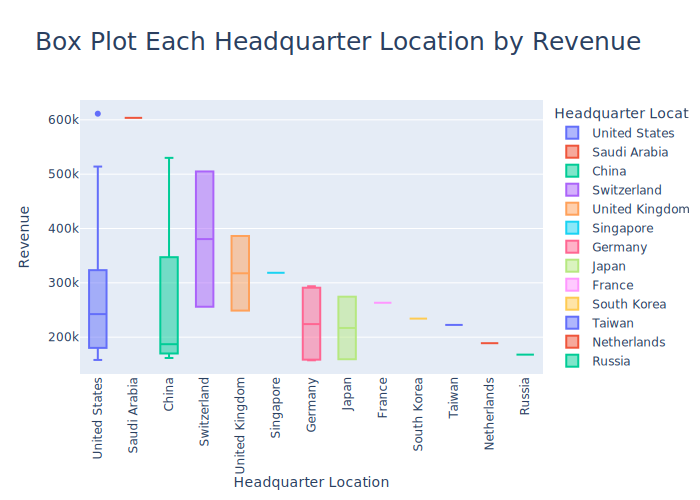

In [30]:
#Import plotly express
import pandas as pd
import plotly.express as px
import plotly.io as pio

#Create the box plot
fig = px.box(df_clean, x='headquarter_location', 
             y='revenue',  
             color='headquarter_location',
             title='Box Plot Each Headquarter Location by Revenue',
             labels={'revenue': 'Revenue', 'headquarter_location':'Headquarter Location'})

#update layout
fig.update_layout(
    title=dict(font=dict(size=25)),
    xaxis=dict(tickangle=270),
    font_family="Optima",
    title_font_family="Optima",
    hoverlabel=dict(
        font=dict(family="Optima", 
                 color="white")))
    

# Show the plot
fig.show('svg')

### Insight : 

- The boxplot reveals that the dataset is not sufficiently representative to provide a detailed summary. Several companies listed based on their headquarters' location are only represented by a single company.
- However, a notable observation is that companies headquartered in Saudi Arabia have the highest average revenue compared to other locations. This is followed by Switzerland and the United Kingdom. It is noteworthy that in the United States, the distribution range of the average revenue is quite extensive.

## 7.2 What is the geographic distribution of total revenue for companies based on their headquarter locations?

First, we need to group the headquarter location and then sum the revenue. Then, we will create a map. 

In [20]:
#Wrangling the data and assign as num_1
num_1 = df_clean.groupby('headquarter_location')[['revenue']].sum().reset_index().sort_values('revenue', ascending=False)

#Add portion of revenue 
num_1['percentage'] = round(num_1['revenue']*100/num_1['revenue'].sum(),2)

# Check the dataframe
num_1

,headquarter_location,revenue,percentage
12,United States,5563448,40.60
0,China,3411213,24.89
2,Germany,899197,6.56
9,Switzerland,760984,5.55
11,United Kingdom,635092,4.63
6,Saudi Arabia,603651,4.41
3,Japan,433862,3.17
7,Singapore,318476,2.32
1,France,263310,1.92
8,South Korea,234129,1.71


Great! Now, I'd like to utilize a built-in map by downloading a GeoJSON file from https://geojson-maps.ash.ms. Subsequently, we can merge this file with our dataset (num_1). Then, using choropleth_mapbox by Plotly, we can create a geographical distribution based on total revenue. Essentially, we need to ensure that the column in the world file matches with the column in our DataFrame (df), so that revenue can be rendered on the map.

In [21]:
#Open file using geopandas
import geopandas as gpd
world = gpd.read_file('custom.geo.json')
world.head()

,featurecla,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,tlc,admin,...,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,filename,geometry
0,Admin-0 country,1,5,Costa Rica,CRI,0,2,Sovereign country,1,Costa Rica,...,None,None,None,None,None,None,None,None,CRI.geojson,"POLYGON ((-82.54620 9.56613, -82.93289 9.47681..."
1,Admin-0 country,1,5,Nicaragua,NIC,0,2,Sovereign country,1,Nicaragua,...,None,None,None,None,None,None,None,None,NIC.geojson,"POLYGON ((-83.65561 10.93876, -83.89505 10.726..."
2,Admin-0 country,1,5,Haiti,HTI,0,2,Sovereign country,1,Haiti,...,None,None,None,None,None,None,None,None,HTI.geojson,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
3,Admin-0 country,1,5,Dominican Republic,DOM,0,2,Sovereign country,1,Dominican Republic,...,None,None,None,None,None,None,None,None,DOM.geojson,"POLYGON ((-71.70830 18.04500, -71.68774 18.316..."
4,Admin-0 country,1,6,El Salvador,SLV,0,2,Sovereign country,1,El Salvador,...,None,None,None,None,None,None,None,None,SLV.geojson,"POLYGON ((-89.35333 14.42413, -89.05851 14.340..."


Let's check if the headquarter location name is similar name with in coloumn admin in the world. Then, we can replace it with the similar name in the world file.Lastly, we can merge the dataframe and assign it as merged_df

In [22]:
#Check the location and replace it
num_1['similar_name'] = num_1['headquarter_location'].isin(world['admin'])
num_1['headquarter_location']  = num_1['headquarter_location'].replace('United States', 'United States of America')


# Merge the two DataFrames 
merged_df = world.merge(num_1, left_on='admin', right_on='headquarter_location', how='left')
merged_df.head()

,featurecla,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,tlc,admin,...,fclass_nl,fclass_se,fclass_bd,fclass_ua,filename,geometry,headquarter_location,revenue,percentage,similar_name
0,Admin-0 country,1,5,Costa Rica,CRI,0,2,Sovereign country,1,Costa Rica,...,None,None,None,None,CRI.geojson,"POLYGON ((-82.54620 9.56613, -82.93289 9.47681...",NaN,NaN,NaN,NaN
1,Admin-0 country,1,5,Nicaragua,NIC,0,2,Sovereign country,1,Nicaragua,...,None,None,None,None,NIC.geojson,"POLYGON ((-83.65561 10.93876, -83.89505 10.726...",NaN,NaN,NaN,NaN
2,Admin-0 country,1,5,Haiti,HTI,0,2,Sovereign country,1,Haiti,...,None,None,None,None,HTI.geojson,"POLYGON ((-71.71236 19.71446, -71.62487 19.169...",NaN,NaN,NaN,NaN
3,Admin-0 country,1,5,Dominican Republic,DOM,0,2,Sovereign country,1,Dominican Republic,...,None,None,None,None,DOM.geojson,"POLYGON ((-71.70830 18.04500, -71.68774 18.316...",NaN,NaN,NaN,NaN
4,Admin-0 country,1,6,El Salvador,SLV,0,2,Sovereign country,1,El Salvador,...,None,None,None,None,SLV.geojson,"POLYGON ((-89.35333 14.42413, -89.05851 14.340...",NaN,NaN,NaN,NaN


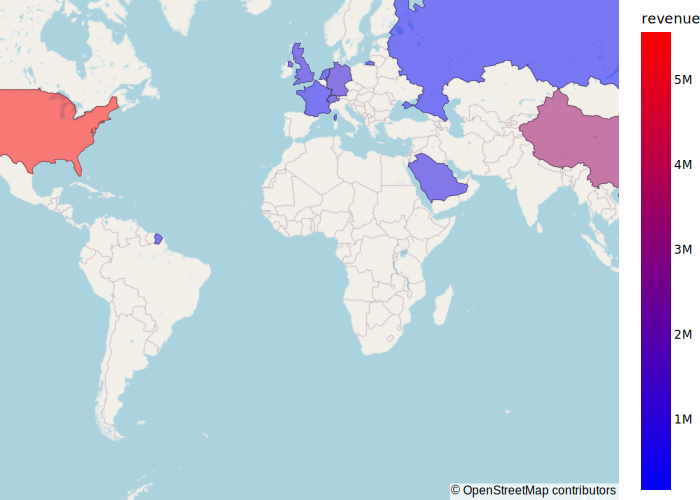

In [31]:
#Import geopandas and json 
import geopandas as gpd
import json


#Create a map
fig = px.choropleth_mapbox(
    merged_df,
    geojson=merged_df.geometry,
    locations=merged_df.index,
    color="revenue",
    color_continuous_scale="bluered",
    mapbox_style="open-street-map",
    center={"lat": 0, "lon": 0},  # Center of the world
    zoom=1,  # Zoom level to show the entire world
    opacity=0.5,
    #hover_name="headquarter_location", 
    #hover_data=["revenue", "profit", "employee_number"]
    
)

fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    font_family="Optima",
    font_color="black",
    title_font_family="Optima",
    hoverlabel=dict(
        font=dict(family="Optima", 
                 color="white")))

fig.show('svg')



### **Insight :**

In the map above, it is evident that companies positioned within the top 50, with their headquarters based in the United States, outshine their counterparts in other geographical regions in terms of revenue. Their collective revenue represents a substantial 40% of the overall revenue contributed by all listed companies. China follows closely, making a significant contribution of nearly 25% to the total revenue. This observation underscores the prominence of U.S.-based companies in this elite group, emphasizing their substantial share of the total revenue pie. Similarly, China emerges as a key player, making a noteworthy contribution to the cumulative revenue generated by these top companies.

## **7.3 Is there a correlation among rank, revenue, profit, and the number of employees?**

To assess the correlation between each pair of columns, we can use the `corr()` function. For a more visually appealing representation, let's generate a correlation map using Plotly's `px.imshow()`.

In [24]:
df_clean['rank'] = pd.to_numeric(df_clean['rank'], errors='coerce')

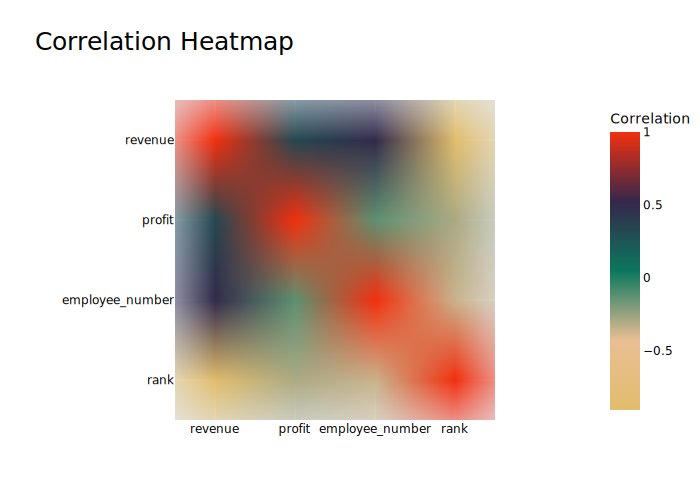

In [32]:
#Fancy to use wesanderson 
import wesanderson

# Calculate the correlation matrix
correlation_matrix = df_clean[['revenue','profit','employee_number', 'rank']].corr()

# Create a heatmap
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                title='Correlation Heatmap',
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale=wesanderson.film_palette('rushmore'))

# Customize the plot
fig.update_layout(
    title=dict(font=dict(size=25)),
    font_family="Optima",
    font_color="black",
    title_font_family="Optima",
    hoverlabel=dict(
        font=dict(family="Optima", 
                 color="white")))

fig.show('svg')

### **Insight :**


1. **Employee Number and Revenue:**
The employee number and revenue exhibit a moderate positive correlation. This suggests that, on average, companies with a higher number of employees tend to generate more revenue. This relationship is not extremely strong but indicates a tendency for larger workforces in companies that generate higher revenues.

2. **Revenue and Profit:**
The correlation between revenue and profit is weakly positive. This implies that, in general, as revenue increases, there is a tendency for profit to also increase. However, the strength of this relationship is not very pronounced, indicating that higher revenue doesn't guarantee significantly higher profits for these companies.

3. **Revenue and Employee Number:**
The correlation between revenue and the number of employees is weakly negative. This suggests that, on average, companies with higher revenues tend to have a slightly lower number of employees. This could be due to variations in industry practices or business models, where some high-revenue companies may operate with a more efficient or specialized workforce.



## 7.4 Is there a correlation between the average profit margin and revenue per employee across different industries?

We need to add two new columns to our dataset. One is the profit margin, calculated as the ratio of profit to revenue, and the other is revenue per employee, calculated as revenue divided by the number of employees. Afterward, we can group the dataset by industry, calculate the average profit margin and revenue per employee, and create a scatter plot to visualize the relationship between these columns.

In [26]:
df_clean['profit_margin'] = round(df_clean['profit']*100/df_clean['revenue'],2)
df_clean['revenue_employee'] = round(df_clean['revenue']/df_clean['employee_number'],2)
num_2 = df_clean.groupby('industry')[['profit_margin', 'revenue_employee' ]].mean().reset_index()
num_2[['profit_margin', 'revenue_employee' ]] = round(num_2[['profit_margin', 'revenue_employee' ]],2)
num_2

,industry,profit_margin,revenue_employee
0,Automotive,5.92,0.74
1,Chemicals,0.00,0.79
2,Commodities,3.98,117.55
3,Conglomerate,2.74,1.53
4,Construction,1.22,0.61
5,Electricity,0.43,20.88
6,Electronics,15.18,1.19
7,Financials,15.08,0.55
8,Healthcare,2.11,3.34
9,Information technology,28.94,1.20


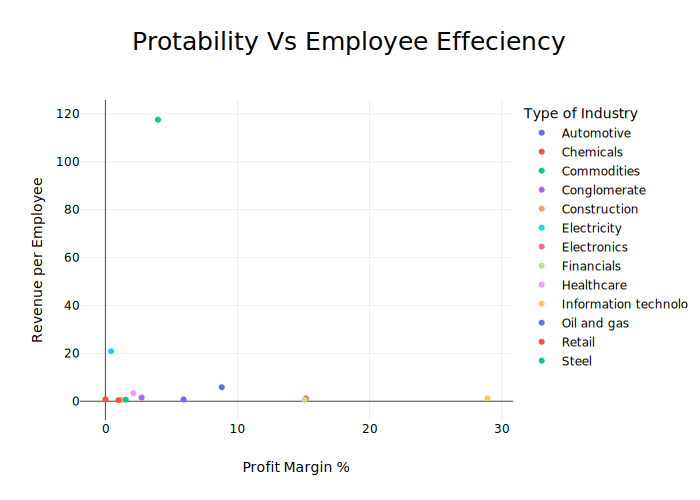

In [33]:
#create scatter plot 
fig = px.scatter(num_2,
                 x="profit_margin", 
                 y="revenue_employee", 
                 color="industry",
                 title='Protability Vs Employee Effeciency',
                 hover_name="industry", 
                 hover_data=["industry", 'profit_margin', 'revenue_employee'],
                 labels={"industry": "Type of Industry",
                         "profit_margin" : 'Profit Margin %',
                         "revenue_employee" : 'Revenue per Employee'})

fig.update_layout(
    title=dict(font=dict(size=25)),
    title_font_color="black",
    font_family="Optima",
    font_color="black",
    title_font_family="Optima",
    legend_title_font_color="black",
    template = 'none',
    hoverlabel=dict(
        font=dict(family="Optima", 
                 color="white"),
    )
)


#show the graph
fig.show('svg')

### Insight :

- The data suggests a trade-off between efficiency, measured by revenue per employee, and profitability, measured by profit margin. Each industry exhibits unique dynamics influenced by its nature, market conditions, and operational challenges. However, there are two exceptional data points in this chart (outliers)

- Firstly, the commodity industry shows a moderate profit margin (3.98%) and exceptionally high revenue per employee (117.55). This indicates that the commodities industry generates significant revenue with relatively fewer employees. The low profit margin might be due to the nature of commodity trading.

- Secondly, the IT industry stands out with a high profit margin (28.94%) and a reasonable revenue per employee (1.20). This suggests that IT companies are efficient in converting revenue into profit and may benefit from scalable business models


Last, save the dataset into csv file so that we can continue to other project and dont forget to create requirement.txt 

In [28]:
df_clean.to_csv('df.csv', index=False)

In [29]:
!pip freeze > requirements.txt